In [20]:
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd

In [21]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)

In [22]:
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,-8.261674,-6.008421,-8.642175,-10.162249,3.647641,10.311172,3.694395,2.199381,-5.648732,4.451379
1,1.489622,-3.183689,5.786972,1.539014,-9.094387,2.089552,-0.316256,-5.468062,7.853460,7.065115
2,-6.936514,-8.269581,6.063023,-6.902656,2.576475,-3.126114,-0.127875,8.981274,7.594333,1.940803
3,-7.823561,-8.758709,2.994915,-7.115819,-0.818632,-4.081266,-0.000288,7.622316,6.305314,1.964137
4,-1.548482,-4.104106,4.729824,2.166716,-7.810419,3.046047,-1.517862,-3.425744,9.879849,6.974308


In [23]:
import hdbscan

In [24]:
clusterer = hdbscan.HDBSCAN()

In [25]:
clusterer.fit(blobs)

HDBSCAN()

In [26]:
clusterer.labels_

array([0, 2, 1, ..., 2, 1, 2])

In [27]:
clusterer.labels_.max()

2

In [28]:
clusterer.probabilities_

array([0.69264985, 0.92480149, 0.48565896, ..., 0.63379716, 0.59724988,
       0.91001222])

In [33]:
hdbscan.dist_metrics.METRIC_MAPPING.keys()

dict_keys(['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'cosine', 'arccos', 'pyfunc'])

In [31]:
def clust_methods(data):
    results = {}
    for metric in hdbscan.dist_metrics.METRIC_MAPPING.keys():
        try:
            if metric == 'minkowski':
                clusterer = hdbscan.HDBSCAN(metric=metric, p=0.05)
                clusterer.fit(data)
            elif metric == 'precomputed':
                distance_matrix = pairwise_distances(data)
                clusterer = hdbscan.HDBSCAN(metric=metric)
                clusterer.fit(distance_matrix)
            else:
                clusterer = hdbscan.HDBSCAN(metric=metric)
                clusterer.fit(data)

            results[metric] = clusterer.probabilities_
        except Exception as e:
            print(f'{metric} metric failed: {str(e)}')
    
    return results

In [32]:
clusters_comp = clust_methods(blobs)

seuclidean metric failed: __init__() takes exactly 1 positional argument (0 given)
mahalanobis metric failed: Must provide either V or VI for Mahalanobis distance
wminkowski metric failed: __init__() takes exactly 2 positional arguments (0 given)
haversine metric failed: Haversine distance only valid in 2 dimensions
cosine metric failed: Unrecognized metric 'cosine'
arccos metric failed: Unrecognized metric 'arccos'
pyfunc metric failed: __init__() takes exactly 1 positional argument (0 given)


In [35]:
clusters_comp

{'euclidean': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'l2': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'minkowski': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'p': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'manhattan': array([0.67436704, 0.75198658, 0.65234803, ..., 0.66791259, 0.67392031,
        0.56199034]),
 'cityblock': array([0.67436704, 0.75198658, 0.65234803, ..., 0.66791259, 0.67392031,
        0.56199034]),
 'l1': array([0.67436704, 0.75198658, 0.65234803, ..., 0.66791259, 0.67392031,
        0.56199034]),
 'chebyshev': array([0.69383491, 0.68685752, 0.61978163, ..., 0.74460048, 0.64401795,
        0.55932733]),
 'infinity': array([0.69383491, 0.68685752, 0.61978163, ..., 0.74460048, 0.64401795,
        0.55932733]),
 'hamming': array([1., 0., 0., ..., 0., 0., 0.]),
 

## Evaluation

In [29]:
from scipy.stats import entropy

In [30]:
def cluster_results(data):
    results = {}
    for metric in hdbscan.dist_metrics.METRIC_MAPPING.keys():
        try:
            if metric == 'minkowski':
                clusterer = hdbscan.HDBSCAN(metric=metric, p=0.05)
                clusterer.fit(data)
            elif metric == 'precomputed':
                distance_matrix = pairwise_distances(data)
                clusterer = hdbscan.HDBSCAN(metric=metric)
                clusterer.fit(distance_matrix)
            else:
                clusterer = hdbscan.HDBSCAN(metric=metric)
                clusterer.fit(data)

            results[metric] = entropy(clusterer.probabilities_)
        except Exception as e:
            print(f'{metric} metric failed: {str(e)}')
    
    return results

In [31]:
results = cluster_results(blobs)

seuclidean metric failed: __init__() takes exactly 1 positional argument (0 given)
mahalanobis metric failed: Must provide either V or VI for Mahalanobis distance
wminkowski metric failed: __init__() takes exactly 2 positional arguments (0 given)
haversine metric failed: Haversine distance only valid in 2 dimensions
cosine metric failed: Unrecognized metric 'cosine'
arccos metric failed: Unrecognized metric 'arccos'
pyfunc metric failed: __init__() takes exactly 1 positional argument (0 given)


In [34]:
{k: v for k, v in sorted(results.items(), key=lambda item: -item[1])}

{'canberra': 7.598975853903575,
 'manhattan': 7.588861960603926,
 'cityblock': 7.588861960603926,
 'l1': 7.588861960603926,
 'chebyshev': 7.588745263554013,
 'infinity': 7.588745263554013,
 'euclidean': 7.58793804217405,
 'l2': 7.58793804217405,
 'minkowski': 7.58793804217405,
 'p': 7.58793804217405,
 'braycurtis': 7.5877957742013145,
 'hamming': 7.58324752430336,
 'matching': 6.289715570908998,
 'jaccard': 6.289715570908998,
 'dice': 6.289715570908998,
 'kulsinski': 6.289715570908998,
 'rogerstanimoto': 6.289715570908998,
 'russellrao': 6.289715570908998,
 'sokalmichener': 6.289715570908998,
 'sokalsneath': 6.289715570908998}

In [48]:
entropies = []
for key, value in clusters_comp.items():
    clust_entropy = entropy(value)
    entropies.append((key, clust_entropy))

In [56]:
entropies.sort()

In [59]:
sorted(entropies, key=lambda x: -x[1])

[('canberra', 7.596179182043109),
 ('cityblock', 7.587390423867996),
 ('l1', 7.587390423867996),
 ('manhattan', 7.587390423867996),
 ('chebyshev', 7.586947029706382),
 ('infinity', 7.586947029706382),
 ('braycurtis', 7.5866516822860355),
 ('l2', 7.586416169932717),
 ('minkowski', 7.586416169932717),
 ('p', 7.586416169932717),
 ('euclidean', 7.533944007681173),
 ('dice', 6.559615237493242),
 ('jaccard', 6.559615237493242),
 ('kulsinski', 6.559615237493242),
 ('matching', 6.559615237493242),
 ('rogerstanimoto', 6.559615237493242),
 ('russellrao', 6.559615237493242),
 ('sokalmichener', 6.559615237493242),
 ('sokalsneath', 6.559615237493242),
 ('hamming', 6.18826412308259)]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [3]:
data = np.load('clusterable_data.npy')

In [4]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

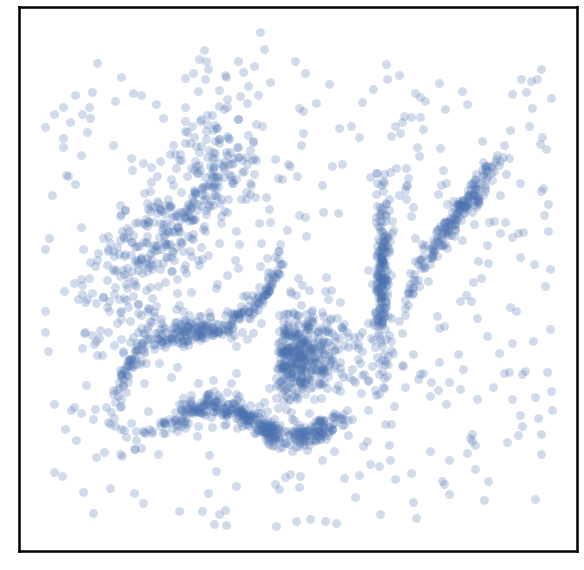

In [5]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [6]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

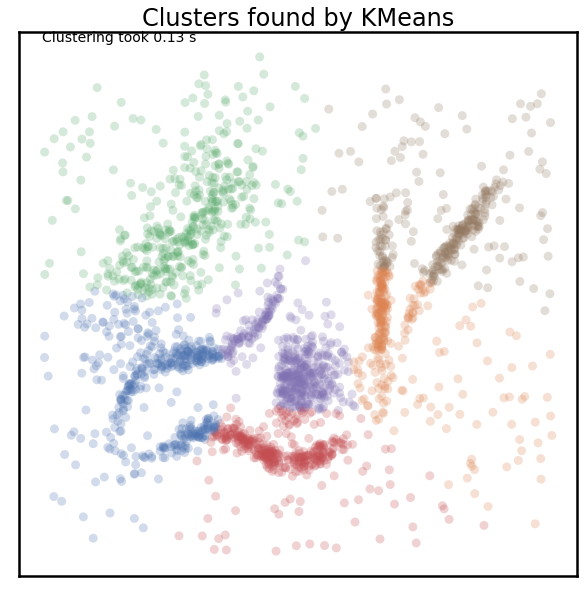

In [7]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

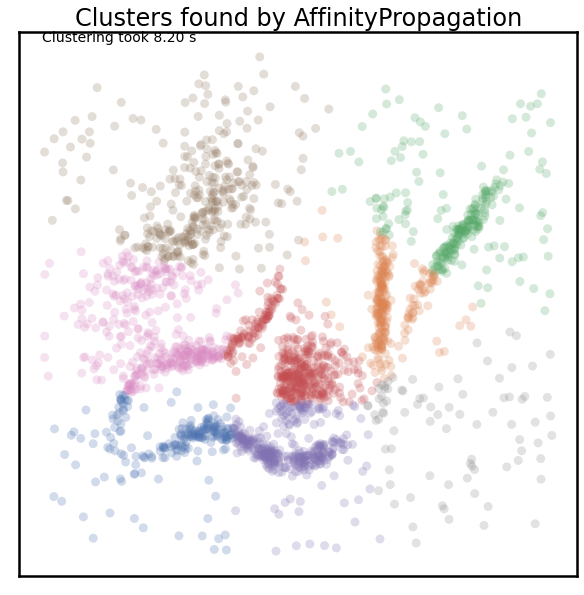

In [8]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

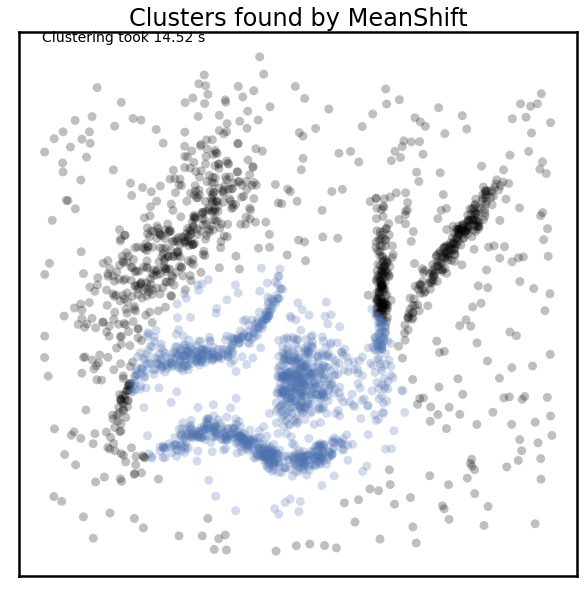

In [11]:
plot_clusters(data, cluster.MeanShift, (), {'cluster_all':False})

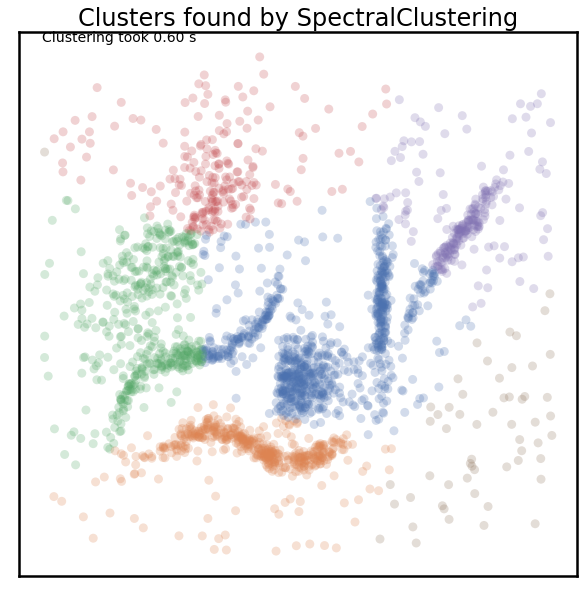

In [12]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

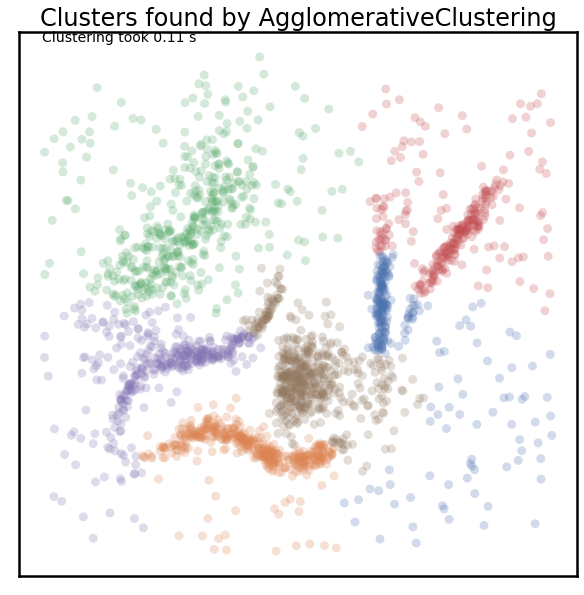

In [13]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

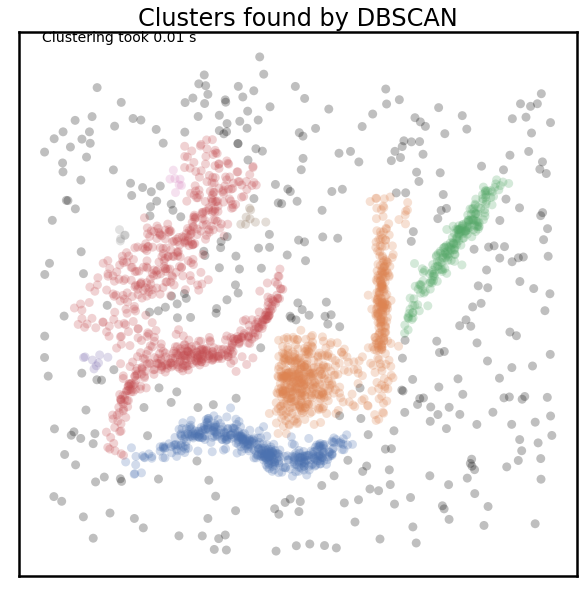

In [14]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

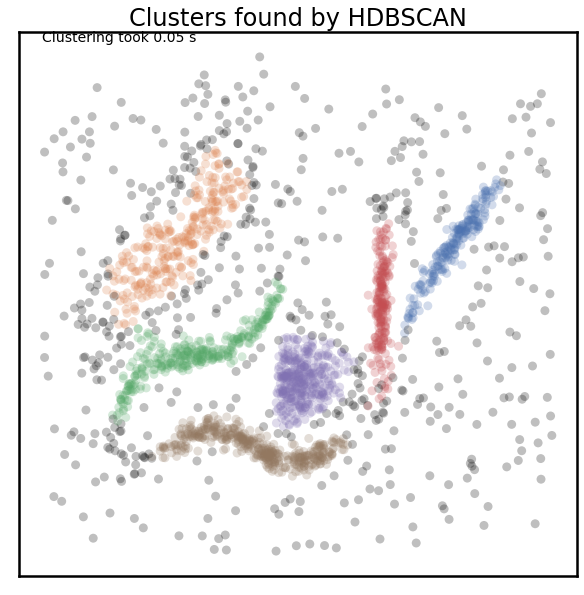

In [19]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})